In [41]:
import numpy as np
import pandas as pd

In [42]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.datasets import make_regression


In [43]:
df = pd.read_csv(f"C:/Users/anandhaKumar.n/python/anand-mtb/transportmodedetuction/standardized_data.csv")

In [44]:
target_values = df['target'].unique()
print(target_values)

['Still' 'Car' 'Train' 'Bus' 'Walking']


In [45]:
t = {'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}
df.target = [t[x] for x in df.target]

In [46]:
data = df
xdata = data.drop('target', axis=1)
X, y = xdata, data.target

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Define Models
lr = LinearRegression()
svr = SVR()
dt = DecisionTreeRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

In [49]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [51]:
# Cross-validation Scores
models = {'LinearRegression': lr, 'SVR': svr, 'DecisionTree': dt, 'XGBoost': xgb}
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cv_scores[name] = scores.mean()


In [52]:
# Fit and Predict on Training Data
train_scores = {}
test_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Training prediction and score
    y_train_pred = model.predict(X_train)
    train_scores[name] = r2_score(y_train, y_train_pred)
    
    # Testing prediction and score
    y_test_pred = model.predict(X_test)
    test_scores[name] = r2_score(y_test, y_test_pred)

In [55]:
# Print results
print("Cross-Validation R² Scores:")
print(cv_scores)
print("\nTraining R² Scores:")
print(train_scores)
print("\nTest R² Scores:")
print(test_scores)

Cross-Validation R² Scores:
{'LinearRegression': np.float64(0.30991335748197757), 'SVR': np.float64(0.18084461625711185), 'DecisionTree': np.float64(0.6023332955601489), 'XGBoost': np.float64(0.8241156339645386)}

Training R² Scores:
{'LinearRegression': 0.32620479421162873, 'SVR': 0.20814151511008294, 'DecisionTree': 1.0, 'XGBoost': 0.9944140911102295}

Test R² Scores:
{'LinearRegression': 0.331669607616372, 'SVR': 0.17786300663600896, 'DecisionTree': 0.634347380107007, 'XGBoost': 0.8298590779304504}


In [56]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(estimators=[
    ('xgb', xgb),
    ('dt', dt)
])

voting_reg.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import r2_score
y_train_voting = voting_reg.predict(X_train)
y_test_voting = voting_reg.predict(X_test)

print("Voting Regressor R² Train:", r2_score(y_train, y_train_voting))
print("Voting Regressor R² Test:", r2_score(y_test, y_test_voting))


Voting Regressor R² Train: 0.9986035250819251
Voting Regressor R² Test: 0.8048693121393253


In [57]:
import matplotlib.pyplot as plt

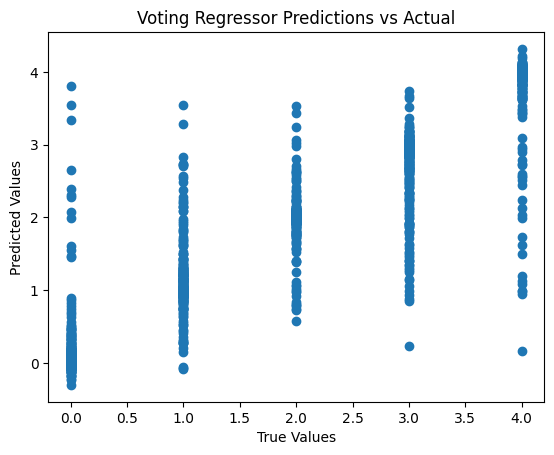

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_voting)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Voting Regressor Predictions vs Actual")
#plt.grid(True)
plt.show()


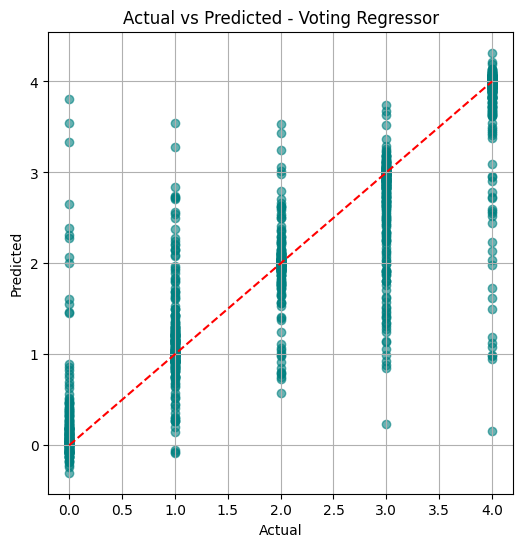

In [59]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_voting, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Voting Regressor")
plt.grid(True)
plt.show()


# Best regerssor for prediction


Train R²: 0.9948
Test R²: 0.9944


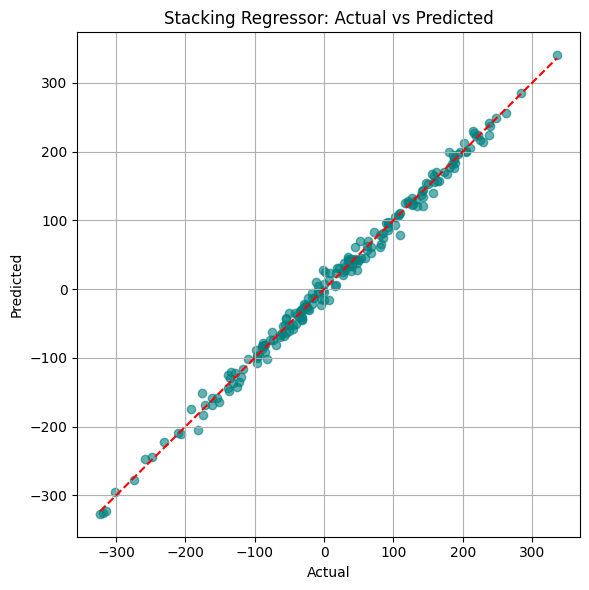

In [60]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. Generate sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define base regressors and final estimator
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42, verbosity=0))
]
final_model = LinearRegression()

# 3. Create stacking pipeline
stacking_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Applies to original features (passthrough=True)
    ('stack', StackingRegressor(
        estimators=base_models,
        final_estimator=final_model,
        cv=5,
        passthrough=True  # Let final model see original features + base outputs
    ))
])

# 4. Fit stacking model
stacking_pipeline.fit(X_train, y_train)

# 5. Predictions
y_train_pred = stacking_pipeline.predict(X_train)
y_test_pred = stacking_pipeline.predict(X_test)

# 6. Accuracy Scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# 7. Visualization (optional)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Stacking Regressor: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
import joblib

# Save the trained stacking pipeline
joblib.dump(stacking_pipeline, 'stacking_regressor_model.pkl')
print("Model saved as 'stacking_regressor_model.pkl'")


Model saved as 'stacking_regressor_model.pkl'


In [62]:
# Access the Linear Regression base model (index 0 in your base_models)
base_lr = stacking_pipeline.named_steps['stack'].estimators_[0]

# Print the intercept and coefficients
print("Base LinearRegression Formula:")
print(f"y = {base_lr.intercept_:.4f} + ", end='')
print(" + ".join([f"({coef:.4f} * x{i})" for i, coef in enumerate(base_lr.coef_)]))


Base LinearRegression Formula:
y = -0.8095 + (34.3574 * x0) + (31.9377 * x1) + (29.4913 * x2) + (76.9844 * x3) + (7.0155 * x4) + (9.8285 * x5) + (71.9136 * x6) + (8.9864 * x7) + (4.9961 * x8) + (60.1742 * x9)


(# Access final estimator (meta-model)

final_lr = stacking_pipeline.named_steps['stack'].final_estimator_

(# Get number of input features passed to final estimator

n_features = X_train.shape[1]  # From passthrough=True

print("\nFinal Meta-Model Formula (Stacking Output):")

print(f"y = {final_lr.intercept_:.4f} + ")

(# Coefficients apply to: [original features + base model outputs]

for i, coef in enumerate(final_lr.coef_):

    if i < n_features:

        print(f"  ({coef:.4f} * x{i})  # original feature")

    else:

        base_idx = i - n_features

        base_name = stacking_pipeline.named_steps['stack'].estimators[base_idx][0]
        
        print(f"  ({coef:.4f} * {base_name}_prediction)")


In [63]:
# Access final estimator (meta-model)
final_lr = stacking_pipeline.named_steps['stack'].final_estimator_

# Get number of input features passed to final estimator
n_features = X_train.shape[1]  # From passthrough=True

print("\nFinal Meta-Model Formula (Stacking Output):")
print(f"y = {final_lr.intercept_:.4f} + ")

# Coefficients apply to: [original features + base model outputs]
for i, coef in enumerate(final_lr.coef_):
    if i < n_features:
        print(f"  ({coef:.4f} * x{i})  # original feature")
    else:
        base_idx = i - n_features
        base_name = stacking_pipeline.named_steps['stack'].estimators[base_idx][0]
        print(f"  ({coef:.4f} * {base_name}_prediction)")



Final Meta-Model Formula (Stacking Output):
y = -3.8141 + 
  (-3.9021 * x0)  # original feature
  (0.0027 * x1)  # original feature
  (0.0067 * x2)  # original feature
  (168.1924 * x3)  # original feature
  (156.4236 * x4)  # original feature
  (144.3137 * x5)  # original feature
  (376.9327 * x6)  # original feature
  (34.3522 * x7)  # original feature
  (48.2535 * x8)  # original feature
  (351.7917 * x9)  # original feature
  (44.1515 * lr_prediction)
  (24.4974 * dt_prediction)
  (294.4605 * xgb_prediction)


In [ ]:
# Access final estimator (meta-model)
final_lr = stacking_pipeline.named_steps['stack'].final_estimator_

# Get number of input features passed to final estimator
n_features = X_train.shape[1]  # From passthrough=True

print("\nFinal Meta-Model Formula (Stacking Output):")
print(f"y = {final_lr.intercept_:.4f} + ")

# Coefficients apply to: [original features + base model outputs]
for i, coef in enumerate(final_lr.coef_):
    if i < n_features:
        print(f"  ({coef:.4f} * x{i})  # original feature")
    else:
        base_idx = i - n_features
        base_name = stacking_pipeline.named_steps['stack'].estimators[base_idx][0]
        print(f"  ({coef:.4f} * {base_name}_prediction)")



Final Meta-Model Formula (Stacking Output):
y = -3.8141 + 
  (-3.9021 * x0)  # original feature
  (0.0027 * x1)  # original feature
  (0.0067 * x2)  # original feature
  (168.1924 * x3)  # original feature
  (156.4236 * x4)  # original feature
  (144.3137 * x5)  # original feature
  (376.9327 * x6)  # original feature
  (34.3522 * x7)  # original feature
  (48.2535 * x8)  # original feature
  (351.7917 * x9)  # original feature
  (44.1515 * lr_prediction)
  (24.4974 * dt_prediction)
  (294.4605 * xgb_prediction)
